In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
cancer.filename

'/home/karan/.local/lib/python3.6/site-packages/sklearn/datasets/data/breast_cancer.csv'

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
np.unique(cancer.target)

array([0, 1])

In [9]:
cancer.data.shape

(569, 30)

In [10]:
# Visualize the dataset

df = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])


In [28]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 1. Centering the data and standardizing 

The first step consists of standardizing the data, which means that we rescale each column (feature) of our data to have a mean of zero.

In [11]:
X = cancer["data"]

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
print(X_std.mean(axis=0))

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]


# 2. Constructing the covariance matrix
Given our centered data matrix, which we call $X_s$, we can compute the covariance matrix simply by:
    $\Sigma = \frac{1}{n-1} X^T_s X_s $
    


In [14]:
cov_mat = (X_std).T.dot(X_std) / (X_std.shape[0]-1)



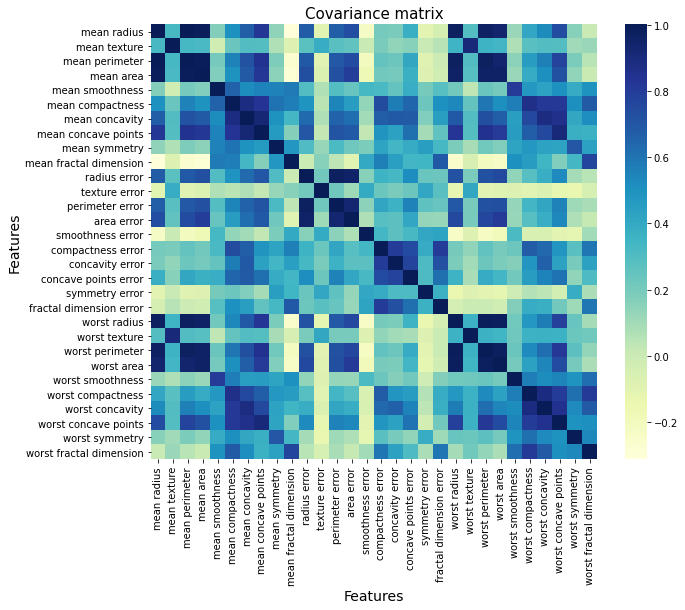

In [19]:
# plot the covariance matrix
cols = df.columns
plt.figure(figsize=(10,8))
f = sns.heatmap(cov_mat, xticklabels=cols, yticklabels=cols, cmap="YlGnBu")
plt.xlabel("Features", size=14)
plt.ylabel("Features", size=14)
plt.title("Covariance matrix", size=15)

plt.savefig("cov_matrix.png", dpi=300, facecolor="white", bbox_inches="tight")


In [40]:
cov_mat_np = np.cov(X_std, rowvar=False)
np.testing.assert_almost_equal(cov_mat, cov_mat_np)

# 3. Computing the eigenvalues and eigenvectors of the covariance matrix

In [20]:
# compute eigendecomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors: \n{}'.format(eig_vecs))
#print('Eigenvalues: \n{}'.format(eig_vals))

# 4. Sorting the eigenvalues and choosing the eigenvectors

the eigenvector which maximizes the variance is the one with the largest eigenvector, and the q eigenvectors which maximize the variance are the ones with the q largest eigenvalues, so we proceed to sorting our eigenvalues and select the corresponding eigenvectors.

In [21]:
srt = np.argsort(eig_vals)[::-1] # indices of eigenvalues from largest to smallest
eig_vals_srtd = eig_vals[srt] # sorted eigenvalues
eig_vecs_srtd = eig_vecs[:, srt] # sorted eigenvectors
print('Sorted eigenvalues: \n{}'.format(eig_vals_srtd))

Sorted eigenvalues: 
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


# Choosing the number of dimensions

In [25]:
main_PC

array([44.27202561, 63.24320765, 72.63637091])

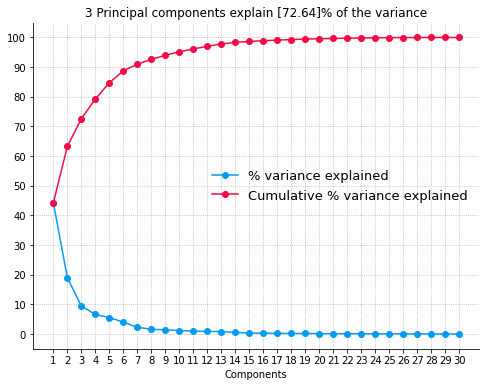

In [27]:
total_var = eig_vals_srtd.sum()
var_exp = np.array([(v / total_var)*100 for v in eig_vals_srtd])
cumulative_var = np.array([np.sum(var_exp[0:i]) for i in range(1, len(var_exp)+1)])

f, ax = plt.subplots(1, 1, figsize=[8,6])
ax.plot(range(len(var_exp)), var_exp,'-o', label='% variance explained', color=sns.xkcd_rgb["azure"])
ax.plot(range(len(var_exp)), cumulative_var,'-o', label='Cumulative % variance explained', c=sns.xkcd_rgb["pinkish red"])
ticks = ax.set_xticks(range(len(var_exp)))
tick_lab = ax.set_xticklabels(range(1, len(var_exp)+1))
yticks = ax.set_yticks(np.arange(0, 110, 10))
sns.despine(fig=f, right=True, top=True)
xlab = ax.set_xlabel('Components')
ax.grid(ls=':')
l = ax.legend(frameon=False, prop={"size":13})

main_PC = np.array(cumulative_var)[:3]
plt.title("%d Principal components explain [%.2f]%% of the variance"%(len(main_PC), main_PC[-1]))

plt.savefig("variance_plot.png", dpi=300, facecolor="white", bbox_inches="tight")

plt.show()

In [28]:
# we take 1st 7 components
# Choosing the eigenvectors

C = eig_vecs_srtd[:, 0:3]
#print(C)

# 5. Projecting the data

In [29]:
Xp = np.matmul(X_std, C)


In [30]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

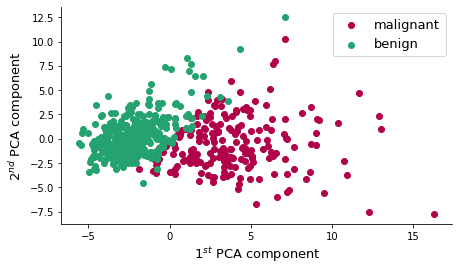

In [37]:

y = cancer.target
target_val = [0,1] # 0 malignant, 1 tumor
colors  = ['raspberry','teal green']#, 'french blue', ]


f, ax = plt.subplots(1, 1, figsize=[7, 4])
for sp, c in zip(target_val, colors):
    ax.scatter(Xp[y==sp,0], Xp[y==sp,1], c=sns.xkcd_rgb[c], label=cancer.target_names[sp])
l = ax.legend(loc="best", prop={"size":13})
sns.despine(fig=f, top=True, right=True)
ax.set_xlabel('$1^{st}$ PCA component', size=13);
ax.set_ylabel('$2^{nd}$ PCA component', size=13);
plt.savefig("PCA_plot.png", dpi=300, facecolor="white", bbox_inches="tight")


In [42]:
dimensions

['Dimension 1', 'Dimension 2', 'Dimension 3']

In [46]:
C

array([[ 0.21890244, -0.23385713, -0.00853124],
       [ 0.10372458, -0.05970609,  0.0645499 ],
       [ 0.22753729, -0.21518136, -0.00931422],
       [ 0.22099499, -0.23107671,  0.02869953],
       [ 0.14258969,  0.18611302, -0.1042919 ],
       [ 0.23928535,  0.15189161, -0.07409157],
       [ 0.25840048,  0.06016536,  0.00273384],
       [ 0.26085376, -0.0347675 , -0.02556354],
       [ 0.13816696,  0.19034877, -0.04023994],
       [ 0.06436335,  0.36657547, -0.02257409],
       [ 0.20597878, -0.10555215,  0.26848139],
       [ 0.01742803,  0.08997968,  0.37463367],
       [ 0.21132592, -0.08945723,  0.26664537],
       [ 0.20286964, -0.15229263,  0.21600653],
       [ 0.01453145,  0.20443045,  0.30883898],
       [ 0.17039345,  0.2327159 ,  0.15477972],
       [ 0.15358979,  0.19720728,  0.17646374],
       [ 0.1834174 ,  0.13032156,  0.22465757],
       [ 0.04249842,  0.183848  ,  0.28858429],
       [ 0.10256832,  0.28009203,  0.21150376],
       [ 0.22799663, -0.21986638, -0.047

In [68]:
# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1,C.shape[1]+1)]
# PCA components
#components = pd.DataFrame(np.round(C[:,0:2].reshape(-1,1).T, 4), columns = cancer.feature_names)
#
components = pd.DataFrame(np.round(C.T, 4), columns = cancer.feature_names)

components.index = dimensions

components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Dimension 1,0.2189,0.1037,0.2275,0.2210,0.1426,0.2393,0.2584,0.2609,0.1382,0.0644,...,0.2280,0.1045,0.2366,0.2249,0.1280,0.2101,0.2288,0.2509,0.1229,0.1318
Dimension 2,-0.2339,-0.0597,-0.2152,-0.2311,0.1861,0.1519,0.0602,-0.0348,0.1903,0.3666,...,-0.2199,-0.0455,-0.1999,-0.2194,0.1723,0.1436,0.0980,-0.0083,0.1419,0.2753
Dimension 3,-0.0085,0.0645,-0.0093,0.0287,-0.1043,-0.0741,0.0027,-0.0256,-0.0402,-0.0226,...,-0.0475,-0.0423,-0.0485,-0.0119,-0.2598,-0.2361,-0.1731,-0.1703,-0.2713,-0.2328


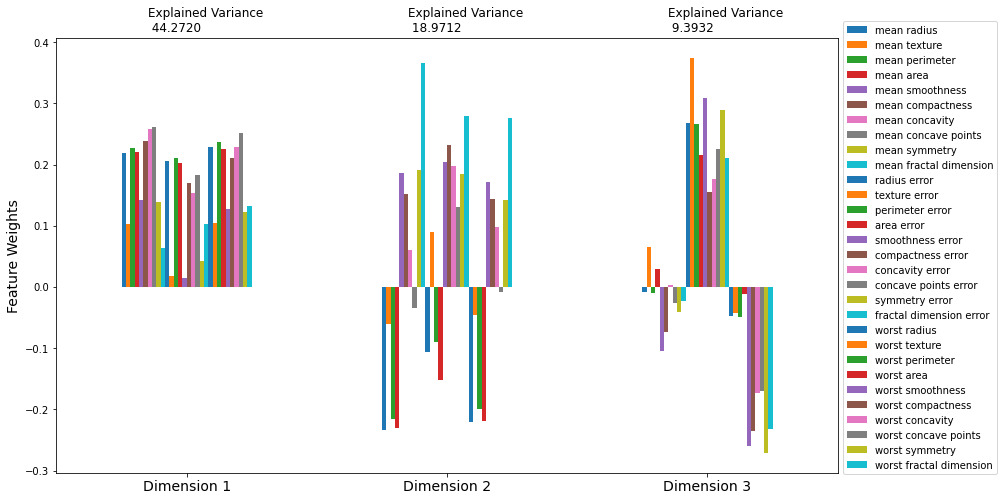

In [78]:
 # Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))

# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights", size=14)
ax.set_xticklabels(dimensions, rotation=0, size=14)

# Display the explained variance ratios
for i, ev in enumerate(var_exp[:3]):
    ax.text(i-0.15, ax.get_ylim()[1] + 0.01, "Explained Variance\n %.4f"%(ev), fontsize=12)
    
ax.legend(bbox_to_anchor=(1, 1.05))
plt.savefig("feature_weights.png", dpi=300, facecolor="white", bbox_inches="tight")


In [79]:
44.2720+18.9712

63.2432

### Manually written Function which receives as input a data matrix X of shape n_samples x n_features, and the number of components we want to use, and returns the lower-dimensional projection.

In [29]:
def apply_PCA(X, n_components=2):
    X_std = X -  np.mean(X, axis=0) # 1. Center the data
    cov_mat = np.cov(X_std, rowvar=False) # 2. Compute the covariance matrix
    eig_vals, eig_vecs = np.linalg.eig(cov_mat) # 3. Eigenvectors and values of the cov. matrix
    srt = np.argsort(eig_vals)[::-1] # 4. Sort and choose the eigenvectors
    eig_vecs_srtd = eig_vecs[:, srt] 
    C = eig_vecs_srtd[:, 0:n_components] 
    Xp = np.matmul(X_std, C) # 5. Project the data
    return Xp

In [ ]:
# 1. Standardize(which also centers) the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# 2. Compute the covariance matrix
cov_mat = (X_std).T.dot(X_std) / (X_std.shape[0]-1)
#cov_mat = np.cov(X_std, rowvar=False) 

# 3. Compute eigenvectors and values of the cov. matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

# 4. Sort and choose the first 3 largest eigenvectors
srt = np.argsort(eig_vals)[::-1] 
eig_vecs_srtd = eig_vecs[:, srt] 
n_components = 3
C = eig_vecs_srtd[:, 0:n_components] 

# 5. Project the data
Xp = np.matmul(X_std, C) 
